# Assignment

## Importing packages

In [2]:
# Cleaning variables in memory
rm(list=ls())

# Graphing
library('ggplot2')
library('gridExtra')
library('ggrepel')
library('ggthemes')

# Handling Data
library('tidyverse') # For tidyr and readr
library('readr') # To import data (belongs to tidyverse)
library('tidyr') # To tidy data (belongs to tidyverse)
library('dplyr')
library('stringr')
library('psych')
library('mice') # Impute categorical variables

# Correlation plots
library('corrplot')

# Missing values / Imputation
library('naniar')
library('simputation')
library('ROSE')
library('smotefamily')

## Importing and cleaning the data

In [3]:
data <- read_csv('data/cancer.csv', col_types=cols())

# Converts all column names to lower case
colnames(data) <- colnames(data) %>% tolower()
colnames(data)[19] <- 'tom' # TotalOtherMorbidity

# Separate race to race and raceID
data <- separate(data, 'race', c('raceid', 'race'), sep=' ', extra='merge')

# Removes duplicated rows
data <- data[!duplicated(data$personid),]

head(data, 3)

personid,expenditure,income,age,bmi,gender,raceid,race,employment,insurance,...,smoker,emphysema,stroke,coronary,cholesterol,diabetes,asthma,highbp,tom,dataset
87099104,19811,29345,70,27.7,1,3,other,0,0,...,0,0,1,1,1,0,0,1,4,train
84516101,6853,10000,44,23.0,1,1,non-indigenous citizen,1,1,...,0,0,0,0,0,0,0,0,0,train
89200106,118,77000,48,29.1,0,1,non-indigenous citizen,1,1,...,99,0,0,0,0,0,0,1,1,train


In [4]:
glimpse(data)

Observations: 2,141
Variables: 21
$ personid    <dbl> 87099104, 84516101, 89200106, 81966101, 86368102, 86715...
$ expenditure <dbl> 19811, 6853, 118, 2014, 9785, 1604, 47117, 24420, 49856...
$ income      <dbl> 29345, 10000, 77000, 32000, 50000, 43625, 27600, 15000,...
$ age         <dbl> 70, 44, 48, 63, 60, 59, 75, 52, 83, 63, 84, 82, 51, 68,...
$ bmi         <dbl> 27.7, 23.0, 29.1, 29.1, 22.9, 32.7, 38.0, 39.1, 23.0, 2...
$ gender      <dbl> 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1...
$ raceid      <chr> "3", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", ...
$ race        <chr> "other", "non-indigenous citizen", "non-indigenous citi...
$ employment  <dbl> 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1...
$ insurance   <dbl> 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0...
$ mhscore     <dbl> 3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 1, 1, 4, 3, 2, 1, 3, 2, 2...
$ smoker      <dbl> 0, 0, 99, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
$ emphysema   <dbl

Convert the appropriate variables to factors:

In [5]:
cols <- colnames(data)[6:21]
data[cols] <- lapply(data[cols], factor)
data$mhscore <- factor(data$mhscore, ordered = TRUE)
data$tom <- factor(data$tom, ordered = TRUE)
summary(data)

    personid         expenditure         income            age       
 Min.   :40010102   Min.   :     4   Min.   :  1000   Min.   : 2.00  
 1st Qu.:44854102   1st Qu.:  1838   1st Qu.: 17800   1st Qu.:50.00  
 Median :80234102   Median :  4805   Median : 34528   Median :60.00  
 Mean   :65427258   Mean   : 11160   Mean   : 47830   Mean   :59.75  
 3rd Qu.:85223101   3rd Qu.: 12255   3rd Qu.: 62381   3rd Qu.:69.00  
 Max.   :89688102   Max.   :247828   Max.   :359704   Max.   :85.00  
                                                                     
      bmi        gender   raceid                       race      employment
 Min.   : 9.40   0: 929   1:1392   indigenous citizen    : 540   0:1289    
 1st Qu.:26.60   1:1212   2: 540   non-indigenous citizen:1392   1: 852    
 Median :30.70            3: 209   other                 : 209             
 Mean   :31.76                                                             
 3rd Qu.:35.70                                              

Looking at the summary, there are a few data poins that appear unreasonable:
* age = 2
* bmi < 15

So, I linear imputed the affected rows.

In [6]:
data %>% filter(age==2)

personid,expenditure,income,age,bmi,gender,raceid,race,employment,insurance,...,smoker,emphysema,stroke,coronary,cholesterol,diabetes,asthma,highbp,tom,dataset
45781001,7422,78120,2,30.5,0,1,non-indigenous citizen,1,0,...,99,0,0,1,0,1,0,1,3,test


In [7]:
data %>% filter(bmi<15)

personid,expenditure,income,age,bmi,gender,raceid,race,employment,insurance,...,smoker,emphysema,stroke,coronary,cholesterol,diabetes,asthma,highbp,tom,dataset
88712102,8037,359704,56,9.4,1,1,non-indigenous citizen,1,0,...,0,0,0,0,1,0,0,1,2,train


In [8]:
glimpse(data)

Observations: 2,141
Variables: 21
$ personid    <dbl> 87099104, 84516101, 89200106, 81966101, 86368102, 86715...
$ expenditure <dbl> 19811, 6853, 118, 2014, 9785, 1604, 47117, 24420, 49856...
$ income      <dbl> 29345, 10000, 77000, 32000, 50000, 43625, 27600, 15000,...
$ age         <dbl> 70, 44, 48, 63, 60, 59, 75, 52, 83, 63, 84, 82, 51, 68,...
$ bmi         <dbl> 27.7, 23.0, 29.1, 29.1, 22.9, 32.7, 38.0, 39.1, 23.0, 2...
$ gender      <fct> 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1...
$ raceid      <fct> 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2...
$ race        <fct> other, non-indigenous citizen, non-indigenous citizen, ...
$ employment  <fct> 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1...
$ insurance   <fct> 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0...
$ mhscore     <ord> 3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 1, 1, 4, 3, 2, 1, 3, 2, 2...
$ smoker      <fct> 0, 0, 99, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
$ emphysema   <fct

We notice that there are 160 cases where the value for `smoker` is 99. This represents `NA` data.

In [9]:
clean <- data %>%

    # Replace values with NA
    replace_with_na(replace = list(smoker=99)) %>%
    mutate(age = ifelse(age==2, NA, age)) %>%
    mutate(bmi = ifelse(bmi<15, NA, bmi)) %>%

    # Add columns to record missingness
    bind_shadow(only_miss=TRUE) %>%
    add_label_shadow() %>%

    # Impute
    impute_lm(age ~ expenditure) %>%
    impute_lm(bmi ~ age + gender + income) %>%

    # Round
    mutate(age = round(age, 0)) %>%
    mutate(bmi = round(bmi, 1))

clean <- suppressWarnings(mice(clean, m=5, maxit=1, seed=123, printFlag=FALSE)) %>% complete(5)
clean <- clean[,1:21] %>% droplevels() # Drops empty levels (i.e. 99 in smoker)
clean[,colnames(clean)[1:12]] %>% head(5)

personid,expenditure,income,age,bmi,gender,raceid,race,employment,insurance,mhscore,smoker
87099104,19811,29345,70,27.7,1,3,other,0,0,3,0
84516101,6853,10000,44,23.0,1,1,non-indigenous citizen,1,1,3,0
89200106,118,77000,48,29.1,0,1,non-indigenous citizen,1,1,3,0
81966101,2014,32000,63,29.1,1,1,non-indigenous citizen,0,0,3,0
86368102,9785,50000,60,22.9,1,1,non-indigenous citizen,1,0,3,0


In [10]:
table(clean$smoker)


   0    1 
1804  337 

## Exploratory data analysis

## Histograms

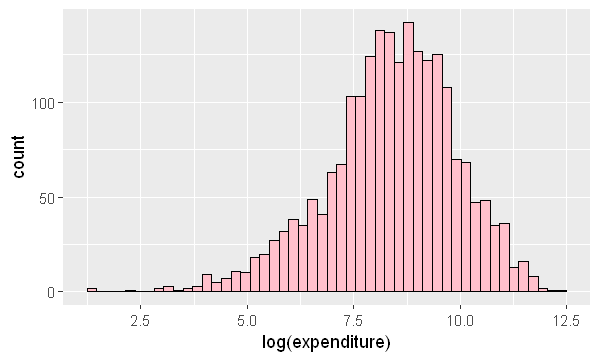

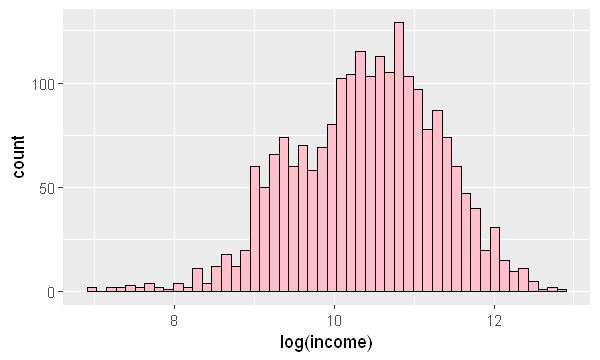

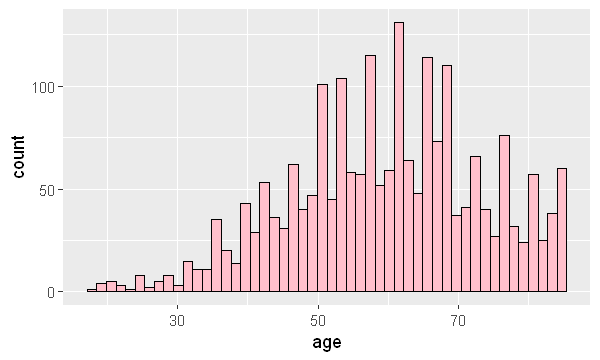

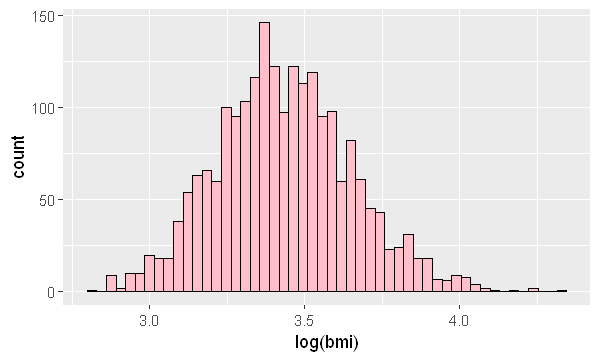

In [11]:
options(repr.plot.width = 5, repr.plot.height = 3)

for (col in colnames(clean)[2:5]) {
    if (col == 'age') {
        plot <- clean %>%
            ggplot(aes(unlist(clean[col]))) +
            geom_histogram(bins=50, fill='pink', colour='black') +
            xlab(col)
    } else {
        plot <- clean %>%
            ggplot(aes(log(unlist(clean[col])))) +
            geom_histogram(bins=50, fill='pink', colour='black') +
            xlab(paste0('log(', col,')'))
    }
    print(plot)
}

### Boxplots

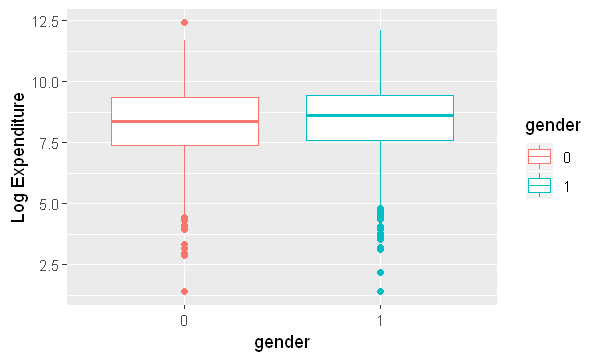

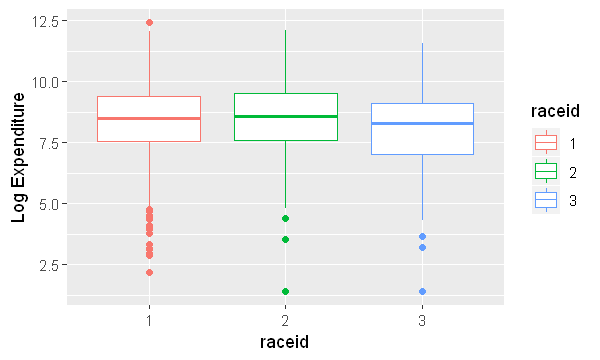

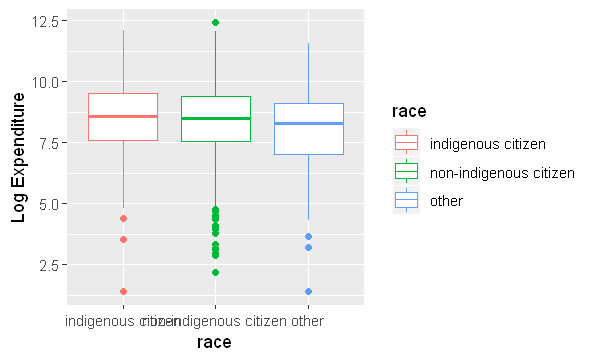

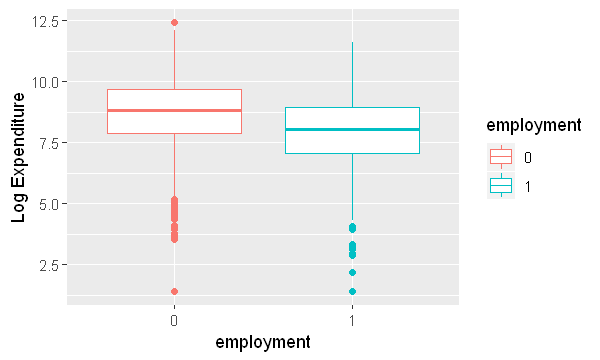

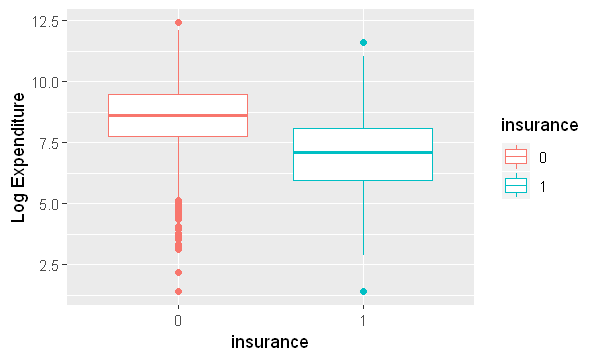

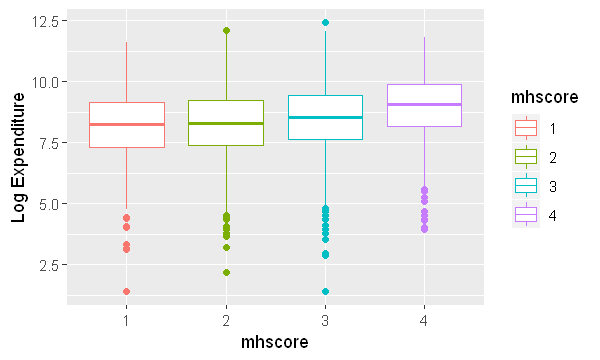

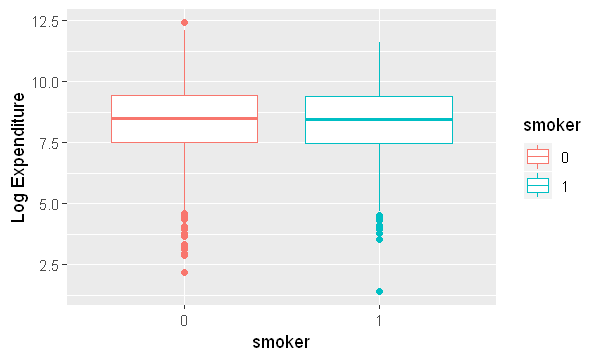

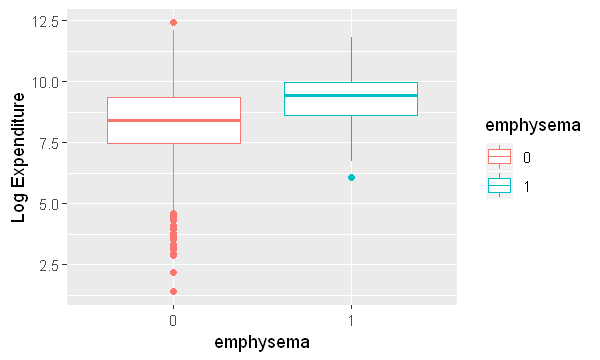

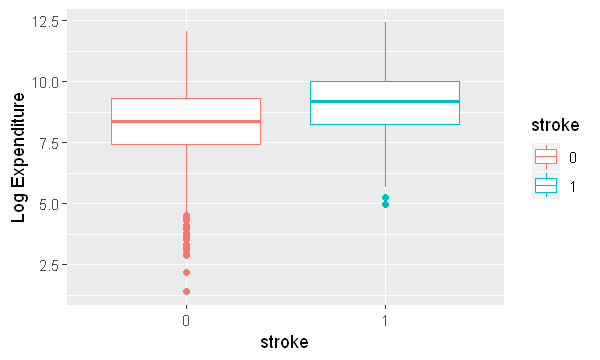

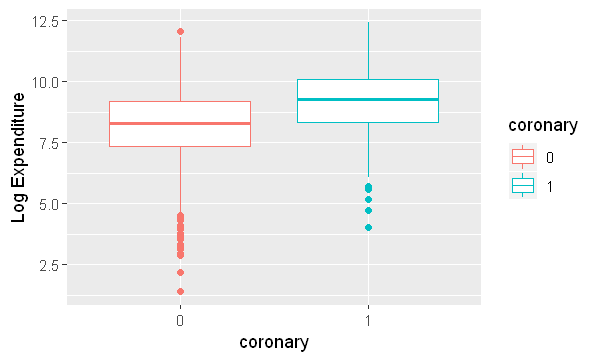

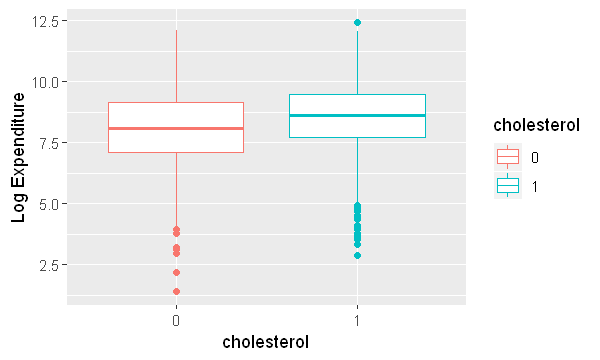

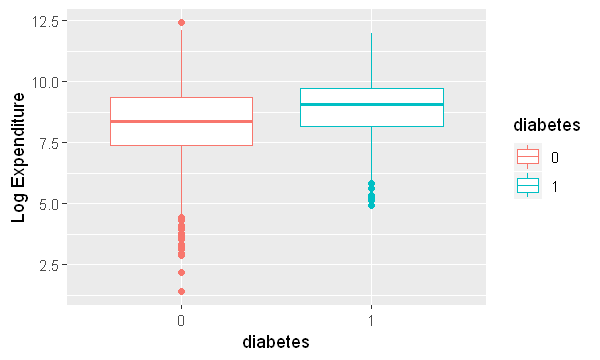

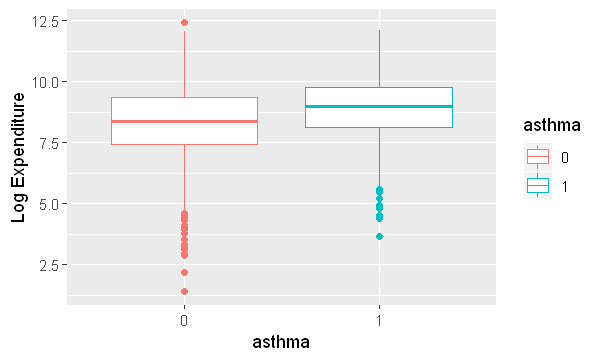

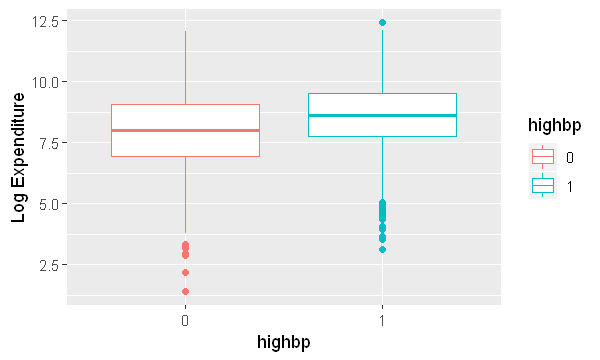

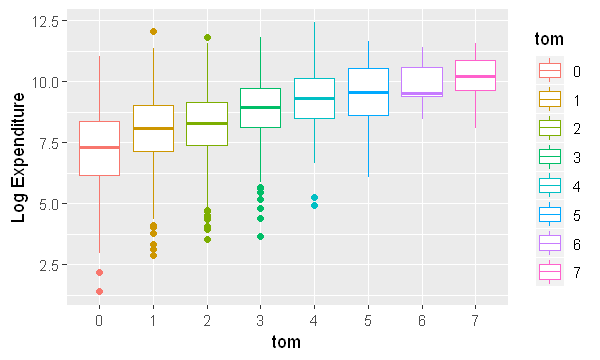

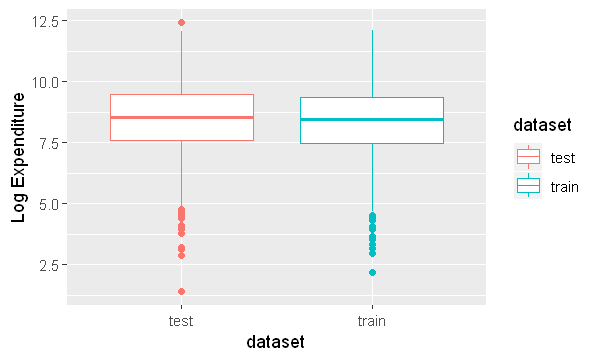

In [12]:
options(repr.plot.width = 5, repr.plot.height = 3)

for (col in colnames(clean)[6:21]) {
    plot <- clean %>%
        ggplot(aes(x=unlist(clean[col]), y=log(expenditure), colour=unlist(clean[col]))) +
        xlab(col) +
        ylab('Log Expenditure') +
        scale_colour_discrete(col) +
        geom_boxplot()
    print(plot)
}

### Scatter Matrix

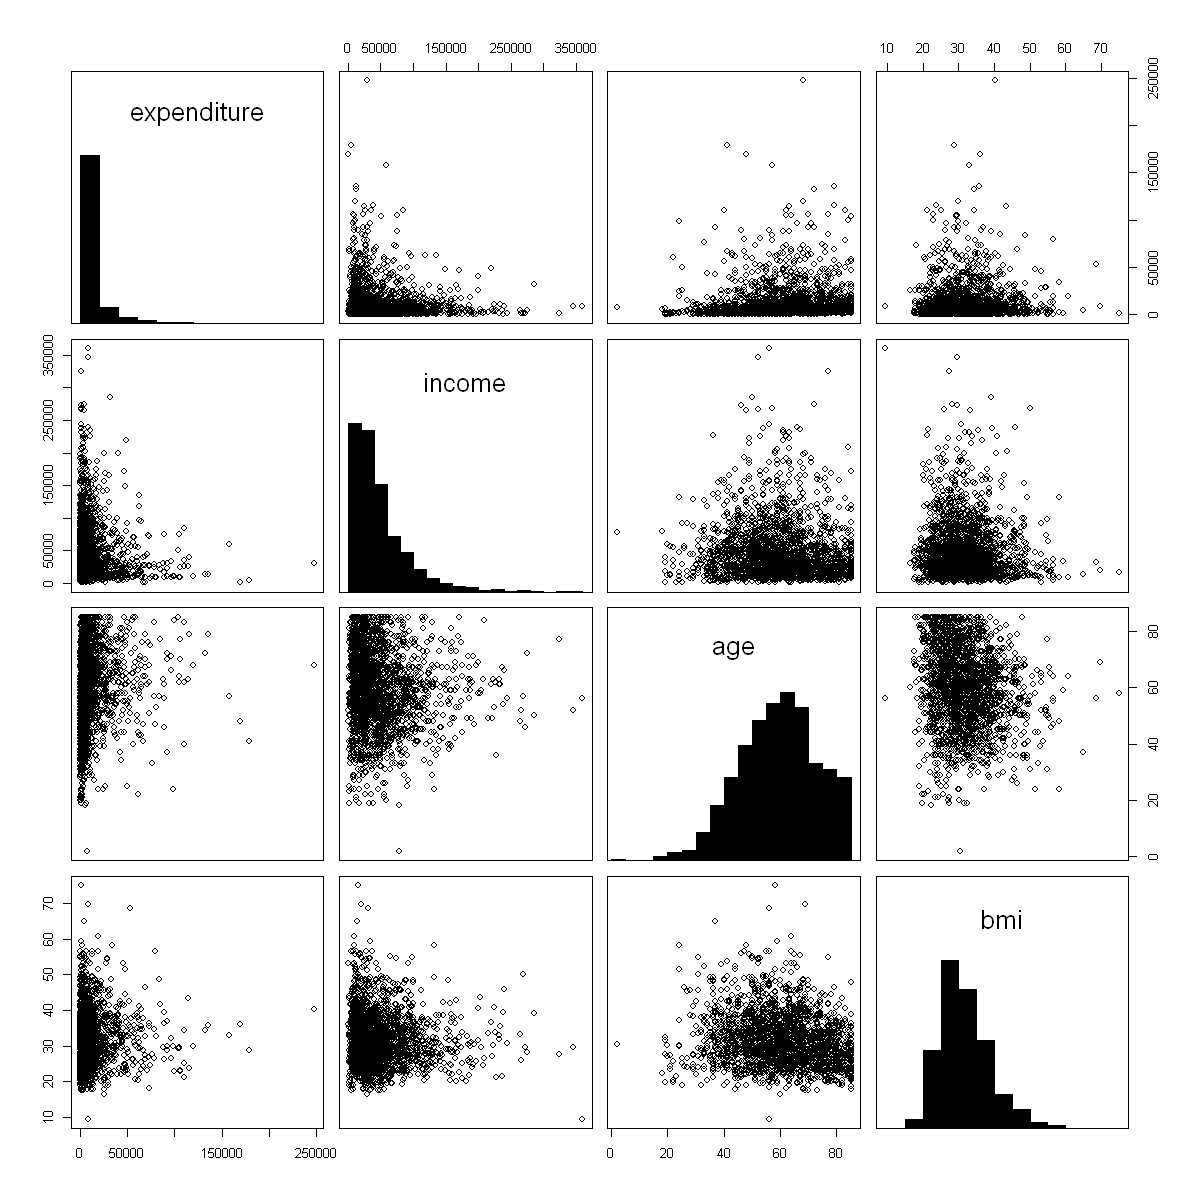

In [13]:
options(repr.plot.width = 10, repr.plot.height = 10)
panel.hist <- function(x, ...)
{
    usr <- par('usr'); on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5) )
    h <- hist(x, plot=FALSE)
    breaks <- h$breaks; nB <- length(breaks)
    y <- h$counts; y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, col='black')
}
pairs(data[,2:5], diag.panel=panel.hist)

## Correlation Plot

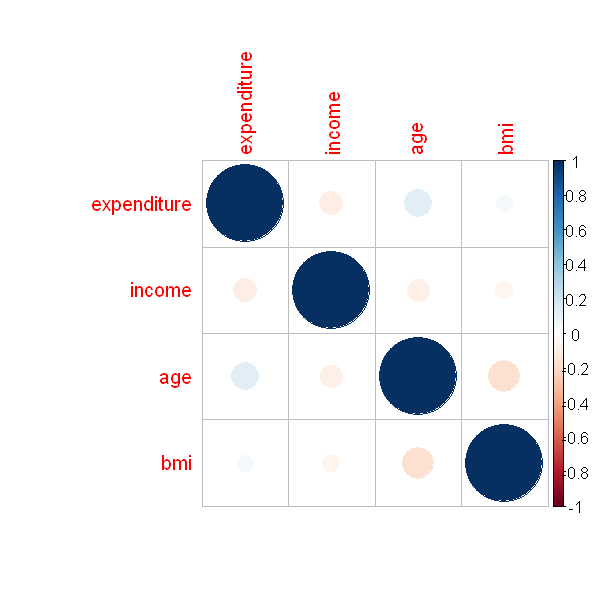

In [14]:
options(repr.plot.width = 5, repr.plot.height = 5)
correlations <- cor(clean[,c(2:5)])
corrplot(correlations)

## Linear Regression

In [15]:
model <- lm(log(expenditure) ~ . - income - bmi + log(income) + log(bmi),
            data=clean[colnames(data)[-c(1,8,21)]])
summary(model)


Call:
lm(formula = log(expenditure) ~ . - income - bmi + log(income) + 
    log(bmi), data = clean[colnames(data)[-c(1, 8, 21)]])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7832 -0.8026  0.0665  0.8560  4.8779 

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.1812134  0.6627788   9.326  < 2e-16 ***
age           0.0088226  0.0026742   3.299 0.000986 ***
gender1       0.0367845  0.0607576   0.605 0.544958    
raceid2       0.1123520  0.0694665   1.617 0.105951    
raceid3      -0.2031095  0.1005422  -2.020 0.043495 *  
employment1  -0.2544959  0.0730867  -3.482 0.000508 ***
insurance1   -1.1293784  0.0980862 -11.514  < 2e-16 ***
mhscore.L     0.2941627  0.0686057   4.288 1.89e-05 ***
mhscore.Q     0.1320765  0.0606456   2.178 0.029528 *  
mhscore.C    -0.0369247  0.0551033  -0.670 0.502868    
smoker1      -0.0001589  0.0817598  -0.002 0.998449    
emphysema1    0.4262692  0.1390748   3.065 0.00

In [16]:
print(paste('AIC:', round(AIC(model), 2)))
print(paste('BIC:', round(BIC(model), 2)))

[1] "AIC: 7319.72"
[1] "BIC: 7472.78"


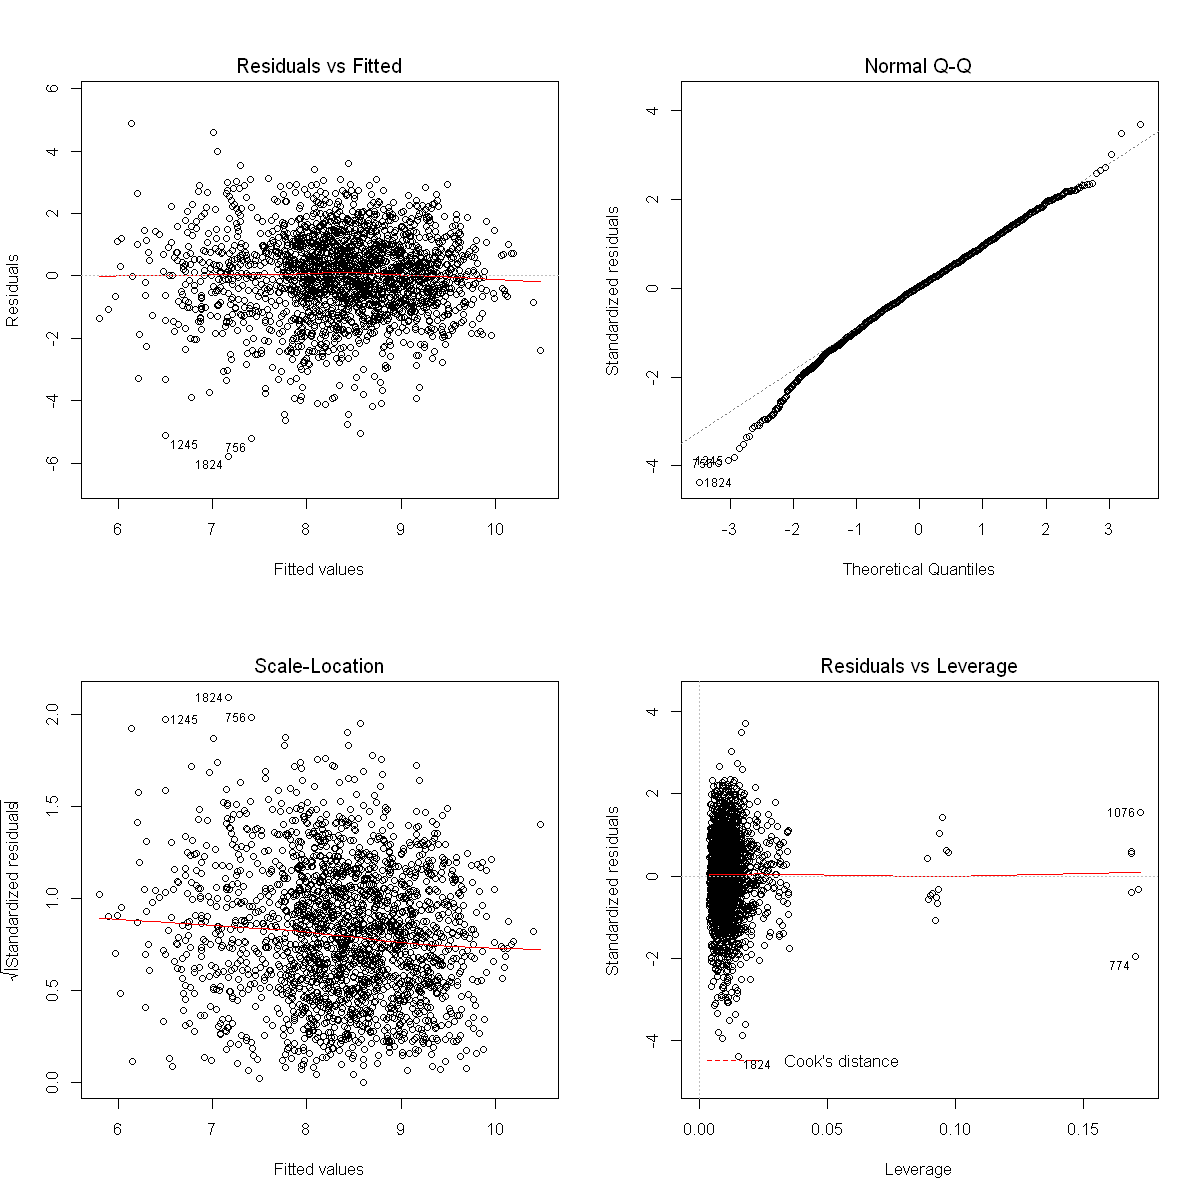

In [17]:
options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow=c(2,2))
plot(model)

## Resources

* [Coerce multiple columns into factors at once](https://stackoverflow.com/questions/33180058/coerce-multiple-columns-to-factors-at-once)
* [How to recode categorical variables](https://www.marsja.se/how-to-rename-factor-levels-in-r-dplyr/)
* [Histograms on diagonal of pairs()](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/pairs)
* [What is I() in linear regression](https://stackoverflow.com/questions/24192428/what-does-the-capital-letter-i-in-r-linear-regression-formula-mean)
* [Returning NA coefficient in lm()](https://stats.stackexchange.com/questions/25804/why-would-r-return-na-as-a-lm-coefficient)
* [Exclude specific variables in lm()](https://stackoverflow.com/questions/22580379/how-do-i-exclude-specific-variables-from-a-glm-in-r)
* [Saving a ggplot](https://www.datanovia.com/en/blog/how-to-save-a-ggplot/)